In [2]:
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
df=pd.read_csv("./dataset/customer_churn.csv")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.drop("customerID",axis="columns",inplace=True)

In [8]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [10]:
pd.to_numeric(df.TotalCharges,errors='coerce').isnull

<bound method Series.isnull of 0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64>

In [11]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [12]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [13]:
df1=df[df['TotalCharges']!=" "]

In [14]:
df1.TotalCharges=pd.to_numeric(df1.TotalCharges)

C:\Users\Iftekhar\AppData\Local\Temp\ipykernel_11436\695980592.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges=pd.to_numeric(df1.TotalCharges)


In [15]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 
 17  

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

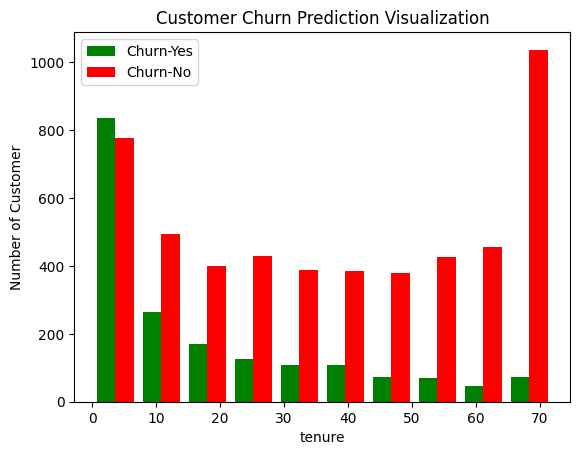

In [16]:
plt.hist([df[df['Churn']=="Yes"].tenure,df[df['Churn']=="No"].tenure],color=['green','red'],label=["Churn-Yes","Churn-No"])
plt.legend()
plt.xlabel("tenure")
plt.ylabel("Number of Customer")
plt.title("Customer Churn Prediction Visualization")

Text(0.5, 1.0, 'Customer Churn Prediction Visualization')

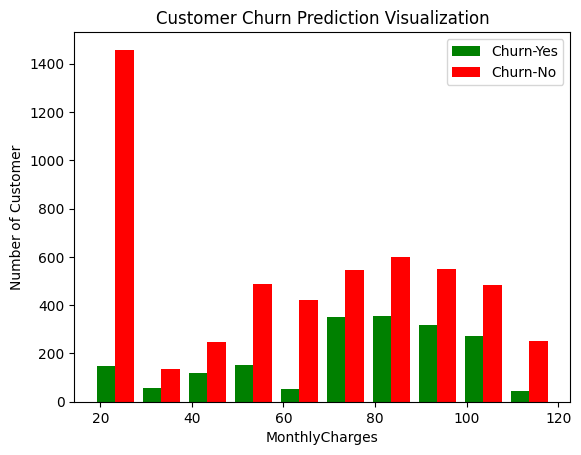

In [17]:
plt.hist([df[df['Churn']=="Yes"].MonthlyCharges,df[df['Churn']=="No"].MonthlyCharges],color=['green','red'],label=["Churn-Yes","Churn-No"])
plt.legend()
plt.xlabel("MonthlyCharges")
plt.ylabel("Number of Customer")
plt.title("Customer Churn Prediction Visualization")

In [18]:
def get_uniquie_cols(df):
 for col in df1:
    if df1[col].dtypes=='object':
       print(df[col].value_counts())

In [19]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [20]:
df1.replace("No phone service","No",inplace=True)
df1.replace("No internet service","No",inplace=True)

C:\Users\Iftekhar\AppData\Local\Temp\ipykernel_11436\3243262309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No phone service","No",inplace=True)
C:\Users\Iftekhar\AppData\Local\Temp\ipykernel_11436\3243262309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace("No internet service","No",inplace=True)


In [21]:
yes_no_cols=[ 'Partner', 'Dependents','PhoneService', 'MultipleLines', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Churn']


In [22]:
for cols in yes_no_cols:
    df1.replace({"Yes":1,"No":0},inplace=True)

C:\Users\Iftekhar\AppData\Local\Temp\ipykernel_11436\2136240571.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.replace({"Yes":1,"No":0},inplace=True)
C:\Users\Iftekhar\AppData\Local\Temp\ipykernel_11436\2136240571.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace({"Yes":1,"No":0},inplace=True)


In [23]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,Male,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,Male,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,Male,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [24]:
get_uniquie_cols(df1)

gender
Male      3549
Female    3483
Name: count, dtype: int64
InternetService
Fiber optic    3096
DSL            2416
0              1520
Name: count, dtype: int64
Contract
Month-to-month    3875
Two year          1685
One year          1472
Name: count, dtype: int64
PaymentMethod
Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: count, dtype: int64


In [25]:
df1['gender'].replace({"Male":0,"Female":1},inplace=True)

C:\Users\Iftekhar\AppData\Local\Temp\ipykernel_11436\3057092498.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({"Male":0,"Female":1},inplace=True)
C:\Users\Iftekhar\AppData\Local\Temp\ipykernel_11436\3057092498.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gende

In [26]:
df1.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,1,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [27]:
df2=pd.get_dummies(data=df1,columns=['Contract',"PaymentMethod","InternetService"])

In [28]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_0,InternetService_DSL,InternetService_Fiber optic
0,1,0,1,0,1,0,0,0,1,0,...,True,False,False,False,False,True,False,False,True,False
1,0,0,0,0,34,1,0,1,0,1,...,False,True,False,False,False,False,True,False,True,False
2,0,0,0,0,2,1,0,1,1,0,...,True,False,False,False,False,False,True,False,True,False
3,0,0,0,0,45,0,0,1,0,1,...,False,True,False,True,False,False,False,False,True,False
4,1,0,0,0,2,1,0,0,0,0,...,True,False,False,False,False,True,False,False,False,True


In [29]:
df2.replace({True:1,False:0},inplace=True)

C:\Users\Iftekhar\AppData\Local\Temp\ipykernel_11436\1249652514.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2.replace({True:1,False:0},inplace=True)


In [30]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_0,InternetService_DSL,InternetService_Fiber optic
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,0,1,0
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,2,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [31]:
df2.shape

(7032, 27)

In [32]:
to_scale_cols=["tenure","MonthlyCharges","TotalCharges"]

In [33]:
import sklearn
from sklearn.preprocessing import MinMaxScaler

In [34]:
mms=MinMaxScaler()

In [35]:
df2[to_scale_cols]=mms.fit_transform(df2[to_scale_cols])

In [36]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_0,InternetService_DSL,InternetService_Fiber optic
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,0,1,0,0,0,0,1,0,1,0
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,0,0,0,1,0,1,0
3,0,0,0,0,0.619718,0,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,1,0,0,0,0,1,0,0,0,1


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   float64
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 non-nul

In [38]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [39]:
X=df2.drop("Churn",axis="columns")
y=df2['Churn']

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=5)

In [42]:
X_train.shape,X_test.shape

((5625, 26), (1407, 26))

In [43]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")

])

model.compile(optimizer='adam',
              loss="binary_crossentropy",metrics=['accuracy'])

model.fit(X_train,y_train,epochs=50)

Epoch 1/50
176/176 [==============================] - 1s 1ms/step - loss: 0.5649 - accuracy: 0.7008
Epoch 2/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4441 - accuracy: 0.7906
Epoch 3/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4251 - accuracy: 0.7936
Epoch 4/50
176/176 [==============================] - 0s 2ms/step - loss: 0.4194 - accuracy: 0.7975
Epoch 5/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.8018
Epoch 6/50
176/176 [==============================] - 0s 971us/step - loss: 0.4135 - accuracy: 0.8023
Epoch 7/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4119 - accuracy: 0.8064
Epoch 8/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4110 - accuracy: 0.8078
Epoch 9/50
176/176 [==============================] - 0s 1ms/step - loss: 0.4102 - accuracy: 0.8082
Epoch 10/50
176/176 [==============================] - 0s 1000us/step - loss: 0.4096 - accuracy: 0

In [44]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 809us/step - loss: 0.4476 - accuracy: 0.7882


[0.4476442039012909, 0.7882018685340881]

In [45]:
y_pred=model.predict(X_test)

44/44 [==============================] - 0s 803us/step


In [46]:
y_predicted=[]

for i in y_pred:
    if i>0.5:
        y_predicted.append(1)
    else:
        y_predicted.append(0)

In [47]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86       999
           1       0.67      0.53      0.59       408

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



In [48]:
import seaborn as sns

Text(50.722222222222214, 0.5, 'Truth')

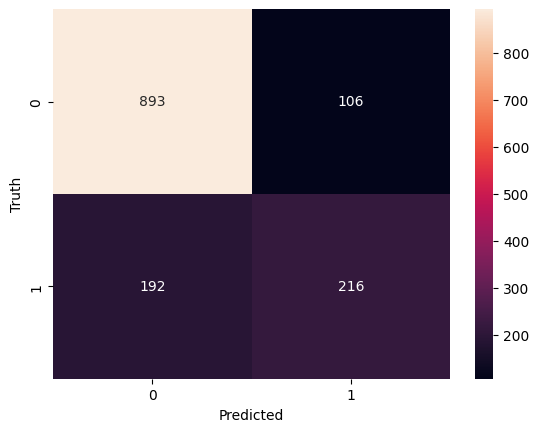

In [49]:
sns.heatmap(confusion_matrix(y_test,y_predicted),annot=True,fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Truth")

**Accuracy vs Precision vs Recall**

https://www.evidentlyai.com/classification-metrics/accuracy-precision-recall

***Imbalace Dataset***

In [50]:
def ANN(X_train,y_train,X_test,y_test,loss,weights):
    model=keras.Sequential([
        keras.layers.Dense(26,input_dim=26,activation='relu'),
        keras.layers.Dense(15,activation="relu"),
        keras.layers.Dense(1,activation='sigmoid')
    ])
    
    model.compile(optimizer='adam',
                  loss=loss,
                  metrics=['accuracy'])
    
    if weights==-1:
        model.fit(X_train,y_train,epochs=100)
    else:
     model.fit(X_train,y_train,epochs=100,class_weight=weights)
    
    print(model.evaluate(X_test,y_test))

    y_preds=model.predict(X_test)
    y_preds=np.round(y_preds)

    print("classification_report : \n",classification_report(y_test,y_preds))

    return y_preds

**1.UnderSampleing**

In [51]:
df_class_0=df2[df2['Churn']==0]
df_class_1=df2[df2['Churn']==1]

In [52]:
df_class_0.shape,df_class_1.shape

((5163, 27), (1869, 27))

In [53]:
df_class_0_under=df_class_0.sample(1869)

In [54]:
df_class_0_under.shape

(1869, 27)

In [55]:
df_test_under=pd.concat([df_class_0_under,df_class_1],axis="rows")

In [56]:
df_test_under.shape

(3738, 27)

In [57]:
X=df_test_under.drop('Churn',axis="columns")
y=df_test_under['Churn']

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [59]:
y_train.value_counts()

Churn
0    1495
1    1495
Name: count, dtype: int64

In [60]:
y_preds=ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
94/94 [==============================] - 1s 1ms/step - loss: 0.6289 - accuracy: 0.6813
Epoch 2/100
94/94 [==============================] - 0s 1ms/step - loss: 0.5252 - accuracy: 0.7595
Epoch 3/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4927 - accuracy: 0.7659
Epoch 4/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4829 - accuracy: 0.7736
Epoch 5/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4766 - accuracy: 0.7746
Epoch 6/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4698 - accuracy: 0.7726
Epoch 7/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4673 - accuracy: 0.7763
Epoch 8/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4649 - accuracy: 0.7759
Epoch 9/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4615 - accuracy: 0.7769
Epoch 10/100
94/94 [==============================] - 0s 1ms/step - loss: 0.4594 - accuracy: 0.7773
Epoch 11/

***OverSmapling***

In [61]:
df_class_1_over=df_class_1.sample(5163,replace=True)

In [62]:
df_class_1_over.shape,df_class_0.shape

((5163, 27), (5163, 27))

In [63]:
df_test_over=pd.concat([df_class_0,df_class_1_over],axis=0)

In [64]:
df_test_over.Churn.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [65]:
X=df_test_over.drop('Churn',axis="columns")
y=df_test_over['Churn']

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

In [67]:
y_preds=ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5796 - accuracy: 0.6969
Epoch 2/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4933 - accuracy: 0.7574
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7628
Epoch 4/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4785 - accuracy: 0.7707
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4747 - accuracy: 0.7718
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4729 - accuracy: 0.7731
Epoch 7/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4706 - accuracy: 0.7724
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4681 - accuracy: 0.7748
Epoch 9/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4652 - accuracy: 0.7764
Epoch 10/100
259/259 [==============================] - 1s 2ms/step - loss: 0.4630 - accura

**3 SMOTE**

In [68]:
X=df2.drop("Churn",axis=1)
y=df2['Churn']

In [69]:
from imblearn.over_sampling import SMOTE

smote=SMOTE(sampling_strategy='minority')


X_sm, y_sm = smote.fit_resample(X, y)

In [70]:
y_sm.value_counts()

Churn
0    5163
1    5163
Name: count, dtype: int64

In [71]:
X_train,X_test,y_train,y_test=train_test_split(X_sm,y_sm,test_size=0.2,random_state=15,stratify=y_sm)

In [72]:
y_preds=ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
259/259 [==============================] - 1s 915us/step - loss: 0.5384 - accuracy: 0.7372
Epoch 2/100
259/259 [==============================] - 0s 977us/step - loss: 0.4771 - accuracy: 0.7760
Epoch 3/100
259/259 [==============================] - 0s 908us/step - loss: 0.4678 - accuracy: 0.7780
Epoch 4/100
259/259 [==============================] - 0s 966us/step - loss: 0.4620 - accuracy: 0.7837
Epoch 5/100
259/259 [==============================] - 0s 935us/step - loss: 0.4579 - accuracy: 0.7863
Epoch 6/100
259/259 [==============================] - 0s 956us/step - loss: 0.4521 - accuracy: 0.7901
Epoch 7/100
259/259 [==============================] - 0s 1ms/step - loss: 0.4487 - accuracy: 0.7919
Epoch 8/100
259/259 [==============================] - 0s 848us/step - loss: 0.4434 - accuracy: 0.7944
Epoch 9/100
259/259 [==============================] - 0s 978us/step - loss: 0.4409 - accuracy: 0.7965
Epoch 10/100
259/259 [==============================] - 0s 890us/step - los

In [73]:
X.shape,y.shape

((7032, 26), (7032,))

In [74]:
y.value_counts()

Churn
0    5163
1    1869
Name: count, dtype: int64

In [75]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=15,stratify=y)

***4.Ensemble***

In [76]:
df3=X_train.copy()
df3['Churn']=y_train

In [77]:
df3_class0=df3[df3['Churn']==0]
df3_class1=df3[df3['Churn']==1]

In [78]:
4130/3


1376.6666666666667

In [85]:
df3_class0.Churn.value_counts(),df3_class1.Churn.value_counts()

(Churn
 0    4130
 Name: count, dtype: int64,
 Churn
 1    1495
 Name: count, dtype: int64)

In [80]:
def get_train_batch(start,end):
    df_train=pd.concat([df_class_0[start:end],df_class_1])

    X_train=df_train.drop("Churn",axis=1)
    y_train=df_train['Churn']

    return X_train,y_train

In [81]:
X_train,y_train=get_train_batch(0,1495)

In [82]:
y_pred1=ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6276 - accuracy: 0.6584
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 0.5136 - accuracy: 0.7580
Epoch 3/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4975 - accuracy: 0.7619
Epoch 4/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4894 - accuracy: 0.7663
Epoch 5/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4847 - accuracy: 0.7684
Epoch 6/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4820 - accuracy: 0.7672
Epoch 7/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4792 - accuracy: 0.7684
Epoch 8/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4760 - accuracy: 0.7741
Epoch 9/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4733 - accuracy: 0.7750
Epoch 10/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4716 - accura

In [83]:
X_train,y_train=get_train_batch(1495,2990)
y_pred2=ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
106/106 [==============================] - 0s 1ms/step - loss: 0.6291 - accuracy: 0.6706
Epoch 2/100
106/106 [==============================] - 0s 1ms/step - loss: 0.5021 - accuracy: 0.7607
Epoch 3/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4900 - accuracy: 0.7640
Epoch 4/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4874 - accuracy: 0.7702
Epoch 5/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4839 - accuracy: 0.7663
Epoch 6/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4804 - accuracy: 0.7723
Epoch 7/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4784 - accuracy: 0.7726
Epoch 8/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4781 - accuracy: 0.7744
Epoch 9/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4754 - accuracy: 0.7723
Epoch 10/100
106/106 [==============================] - 0s 1ms/step - loss: 0.4742 - accura

In [84]:
X_train,y_train=get_train_batch(2990,4130)
y_pred3=ANN(X_train,y_train,X_test,y_test,"binary_crossentropy",-1)

Epoch 1/100
95/95 [==============================] - 1s 1ms/step - loss: 0.6215 - accuracy: 0.6550
Epoch 2/100
95/95 [==============================] - 0s 1ms/step - loss: 0.5058 - accuracy: 0.7667
Epoch 3/100
95/95 [==============================] - 0s 1ms/step - loss: 0.4802 - accuracy: 0.7753
Epoch 4/100
95/95 [==============================] - 0s 1ms/step - loss: 0.4718 - accuracy: 0.7803
Epoch 5/100
95/95 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7843
Epoch 6/100
95/95 [==============================] - 0s 1ms/step - loss: 0.4620 - accuracy: 0.7853
Epoch 7/100
95/95 [==============================] - 0s 1ms/step - loss: 0.4590 - accuracy: 0.7866
Epoch 8/100
95/95 [==============================] - 0s 2ms/step - loss: 0.4604 - accuracy: 0.7870
Epoch 9/100
95/95 [==============================] - 0s 1ms/step - loss: 0.4551 - accuracy: 0.7910
Epoch 10/100
95/95 [==============================] - 0s 2ms/step - loss: 0.4522 - accuracy: 0.7893
Epoch 11/

In [86]:
y_pred_final=y_pred1.copy()

for i in range(len(y_pred1)):
    n_ones=y_pred1[i]+y_pred2[i]+y_pred3[i]
    if n_ones>2:
        y_pred_final[i]=1
    else:
        y_pred_final[i]=0

In [87]:
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.91      0.81      0.86      1033
           1       0.59      0.79      0.68       374

    accuracy                           0.80      1407
   macro avg       0.75      0.80      0.77      1407
weighted avg       0.83      0.80      0.81      1407

